# Attempt at finding the similarity between two images by using the cosine similarity between the predictions produced by a pretrained VGG model

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing import image as kimage


In [3]:
import numpy as np

In [4]:
from tensorflow.keras.applications import VGG16

In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [7]:
from matplotlib import pyplot as plt

In [80]:
from scipy.stats import logistic

In [11]:
model = VGG16(include_top=False, weights='imagenet')

In [217]:
def find_similarity(path1, path2):
    
    img1 = kimage.load_img(path1, target_size=(224, 224))
    x = kimage.img_to_array(img1)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img2 = kimage.load_img(path2, target_size=(224, 224))
    y = kimage.img_to_array(img2)
    y = np.expand_dims(y, axis=0)
    y = preprocess_input(y)
    pred = model.predict(x)
    pred2 = model.predict(y)
    cosloss=tf.keras.losses.CosineSimilarity()
    loss=cosloss(pred,pred2).numpy()
    plt.imshow(img1)
    plt.show()
    plt.imshow(img2)
    plt.show()
    print(-1*loss*2.5*100 if -1*loss*2.5<1 else 1*100,'%') #hardcoded function, can be optimized for better results

# Same image translated

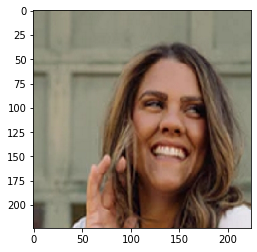

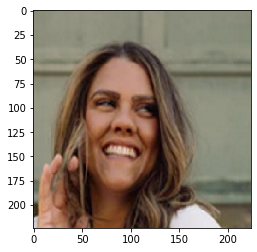

83.63838493824005 %


In [218]:
find_similarity('../Downloads/peoplepics/girl1.jpg','../Downloads/peoplepics/girl_translateresized.jpeg')

# same image produces a result of 100%

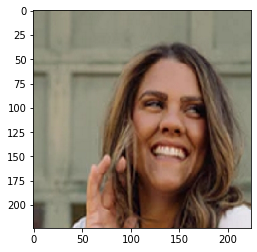

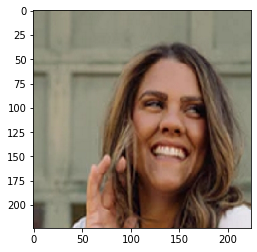

100 %


In [220]:
find_similarity('../Downloads/peoplepics/girl1.jpg','../Downloads/peoplepics/girl1.jpg')

# Different images

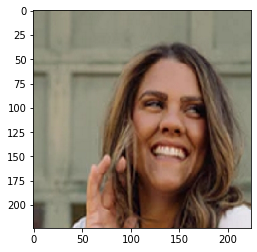

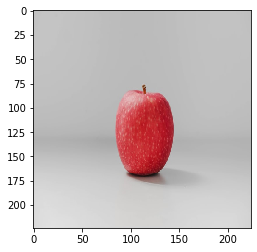

31.353842467069626 %


In [219]:
find_similarity('../Downloads/peoplepics/girl1.jpg','../Downloads/peoplepics/apple.jpeg')

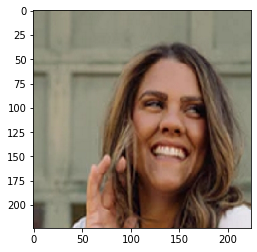

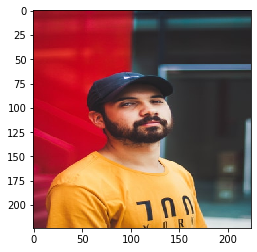

39.778441190719604 %


In [221]:
find_similarity('../Downloads/peoplepics/girl1.jpg','../Downloads/peoplepics/man1.jpeg')